# Metrics, Read Explanation and function

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
import timeit
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
# df = pd.read_csv('input/SDSS_final.csv')

In [4]:
df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,i,z,specobjid,plate,mjd,fiberid,redshift,class
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,15.50342,15.22531,3.720000e+18,3306,54922,491,-0.000009,STAR
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,16.48922,16.39150,3.640000e+17,323,51615,541,-0.000055,STAR
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,17.08732,16.80125,3.230000e+17,287,52023,513,0.123111,GALAXY
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,15.98233,15.90438,3.720000e+18,3306,54922,510,-0.000111,STAR
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,16.55492,16.61326,3.720000e+18,3306,54922,512,0.000590,STAR


In [5]:
df.columns

Index(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift', 'class'],
      dtype='object')

In [6]:
from PIL import Image
import requests

def print_image(index):
    radeg, decdeg = df['ra'][index],df['dec'][index]
    scale = 0.015
    height, width = 512, 512

    str1 = 'http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image'
    str2 = '&ra={:f}&dec={:f}&scale=0.015&width=1024&height=1024&opt=&query='.format(radeg,decdeg)
    url = str1 + str2
    print(url)

    try:
        im = Image.open(requests.get(url, stream=True).raw)
    except:
        pass
        print("Error")
    
    return im


http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=184.350647&dec=0.207230&scale=0.015&width=1024&height=1024&opt=&query=
http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=183.531326&dec=0.089693&scale=0.015&width=1024&height=1024&opt=&query=
http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=184.380919&dec=0.174323&scale=0.015&width=1024&height=1024&opt=&query=


Text(0.5, 1.0, 'GALAXY')

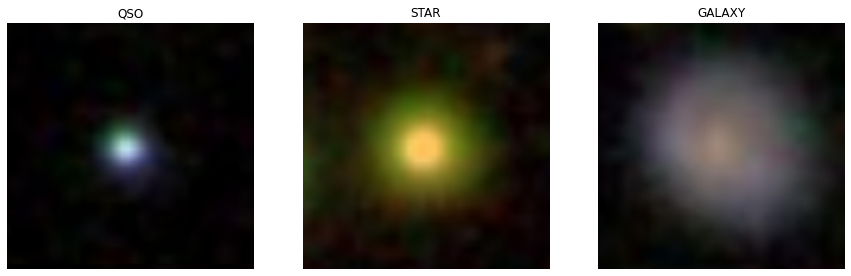

In [7]:
index = [15,0,19]
im1 = print_image(index[0])
im2 = print_image(index[1])
im3 = print_image(index[2])

fig = plt.figure(figsize=(15, 15))
  
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(im1)
plt.axis('off')
plt.title(df['class'][index[0]])

fig.add_subplot(rows, columns, 2)
plt.imshow(im2)
plt.axis('off')
plt.title(df['class'][index[1]])
  
fig.add_subplot(rows, columns, 3)
plt.imshow(im3)
plt.axis('off')
plt.title(df['class'][index[2]])

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [9]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

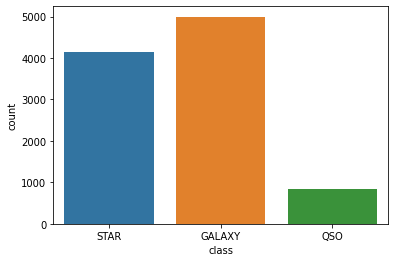

In [10]:
df['class'].head(10)
ax = sns.countplot(x='class',data=df)

<Figure size 432x288 with 0 Axes>

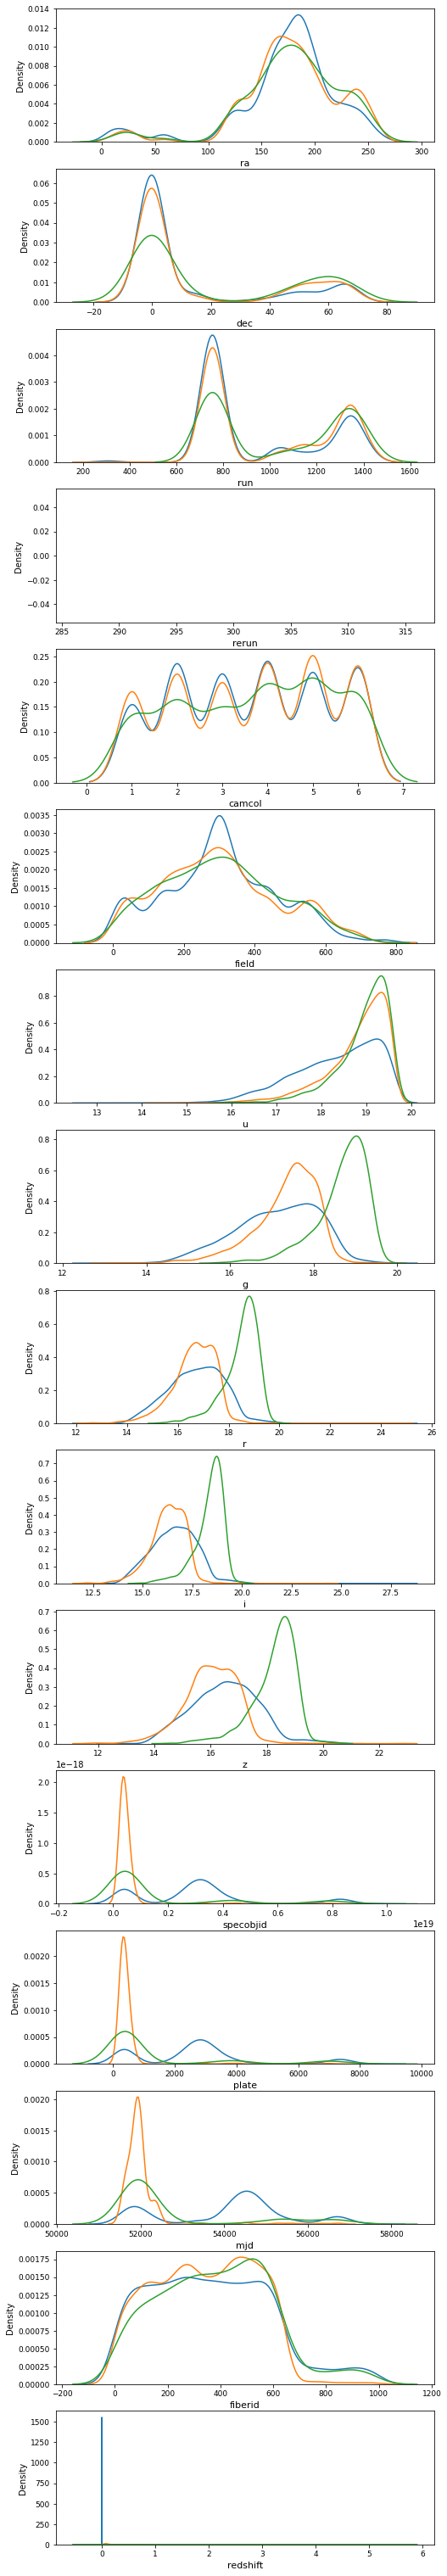

In [11]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
#♠move the target data to the end of the dataframe 
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)
data=data.drop(['objid'],axis=1)
def feature_dist(df0,df1,df2,label0,label1,label2,features):
    plt.figure()
    fig,ax=plt.subplots(16,1,figsize=(8,55))
    i=0
    for ft in features:
        i+=1
        plt.subplot(16,1,i)
        # plt.figure()
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        sns.distplot(df2[ft], hist=False,label=label2)
        plt.xlabel(ft, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()
t0 = data.loc[data['class'] == 0]
t1 = data.loc[data['class'] == 1]
t2 = data.loc[data['class'] == 2]
features = data.columns.values[:16]
feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features)

In [12]:
#data['redshift'].describe()
data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,2,1.218366
1,1,0.080325
0,0,0.000043


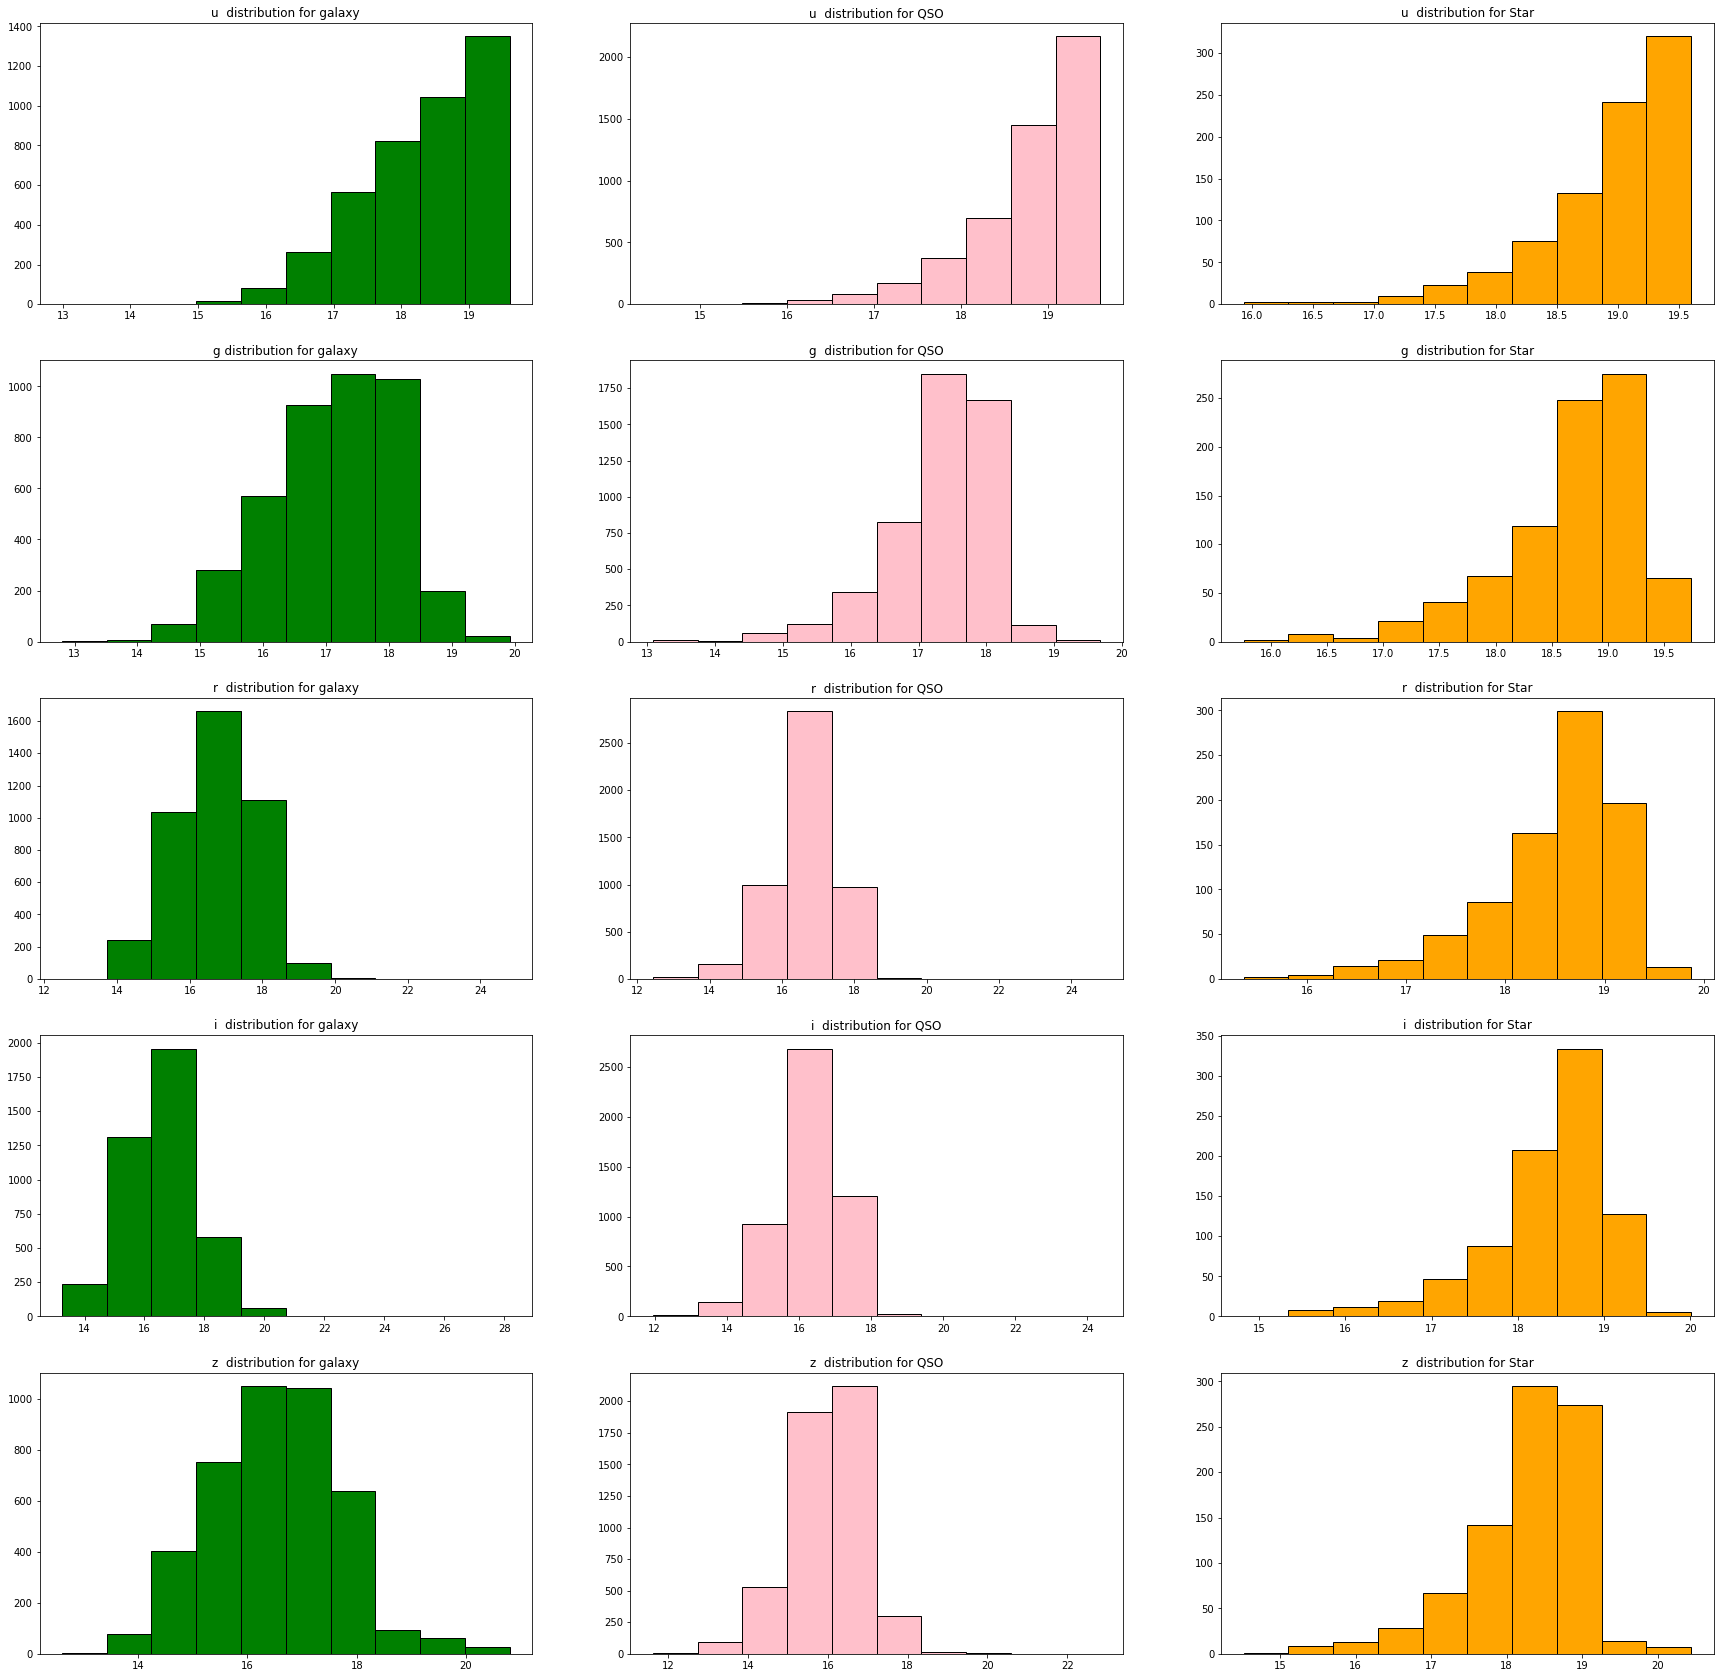

In [13]:
fig,ax = plt.subplots(5,3,figsize = (30,30))
ax[0][0].hist([data[data['class']==0]['u']],color = 'green',edgecolor = 'black');
ax[0][0].set_title('u  distribution for galaxy');
ax[0][1].hist([data[data['class']==1]['u']],color = 'pink',edgecolor = 'black');
ax[0][1].set_title('u  distribution for QSO');
ax[0][2].hist([data[data['class']==2]['u']],color = 'orange',edgecolor = 'black');
ax[0][2].set_title('u  distribution for Star');
ax[1][0].hist([data[data['class']==0]['g']],color = 'green',edgecolor = 'black');
ax[1][0].set_title('g distribution for galaxy');
ax[1][1].hist([data[data['class']==1]['g']],color = 'pink',edgecolor = 'black');
ax[1][1].set_title('g  distribution for QSO');
ax[1][2].hist([data[data['class']==2]['g']],color = 'orange',edgecolor = 'black');
ax[1][2].set_title('g  distribution for Star');
ax[2][0].hist([data[data['class']==0]['r']],color = 'green',edgecolor = 'black');
ax[2][0].set_title('r  distribution for galaxy');
ax[2][1].hist([data[data['class']==1]['r']],color = 'pink',edgecolor = 'black');
ax[2][1].set_title('r  distribution for QSO');
ax[2][2].hist([data[data['class']==2]['r']],color = 'orange',edgecolor = 'black');
ax[2][2].set_title('r  distribution for Star');
ax[3][0].hist([data[data['class']==0]['i']],color = 'green',edgecolor = 'black');
ax[3][0].set_title('i  distribution for galaxy');
ax[3][1].hist([data[data['class']==1]['i']],color = 'pink',edgecolor = 'black');
ax[3][1].set_title('i  distribution for QSO');
ax[3][2].hist([data[data['class']==2]['i']],color = 'orange',edgecolor = 'black');
ax[3][2].set_title('i  distribution for Star');
ax[4][0].hist([data[data['class']==0]['z']],color = 'green',edgecolor = 'black');
ax[4][0].set_title('z  distribution for galaxy');
ax[4][1].hist([data[data['class']==1]['z']],color = 'pink',edgecolor = 'black');
ax[4][1].set_title('z  distribution for QSO');
ax[4][2].hist([data[data['class']==2]['z']],color = 'orange',edgecolor = 'black');
ax[4][2].set_title('z  distribution for Star');

In [14]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,STAR,0.000043
1,QSO,1.218366
0,GALAXY,0.080325


## Distance Sparse

Redshift value shows the lookup on how early was the galaxy formed in universe. Edwin Hubble formulate the redshift into how shifted the wavelength of galaxy, thus indicating the radial velocity


\begin{align}
z = \frac{v}{c} = \frac{\lambda_{v}-\lambda_{0}}{\lambda_{0}}
\end{align}

Hubble's law could be stated in
\begin{align}
v = \frac{H_{0}}{d}
\end{align}



In [15]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['redshift'])
df['distance']= r.value

df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,z,specobjid,plate,mjd,fiberid,redshift,class,l,b,distance
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,15.22531,3.720000e+18,3306,54922,491,-0.000009,STAR,283.064461,61.513772,-0.038750
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,16.39150,3.640000e+17,323,51615,541,-0.000055,STAR,283.169750,61.577466,-0.237432
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,16.80125,3.230000e+17,287,52023,513,0.123111,GALAXY,283.339557,61.593309,517.978264
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,15.90438,3.720000e+18,3306,54922,510,-0.000111,STAR,283.769013,61.576636,-0.478399
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,16.61326,3.720000e+18,3306,54922,512,0.000590,STAR,283.762324,61.630713,2.552829


For map the location of galaxy, we need to plot the cartesian space coordinate from the equatorial coordinate. This one formulated from the galactic coordinate, known distance, galactic longitude, and galactic latitude. 


![Galactic Coordinate](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Galactic_coordinates.JPG/220px-Galactic_coordinates.JPG)

\begin{align}
Image: Wikipedia
\end{align}

Galactic coordinate could be formulated into

\begin{align}
sin(b) = sin(\delta_{NGP}) \ cos(i_{g})  -  cos(\delta) \ sin(\alpha - \alpha_{NGP}) \ sin(i_{g})
\end{align}

\begin{align}
cos(b) \ cos(l-l_{0}) = cos(\delta) \ cos(\alpha - \alpha_{NG})
\end{align}

\begin{align}
cos(b) \ sin(l-l_{0}) = sin(\delta) \ sin(i_{g}) + cos (\delta) \ sin(\alpha - \alpha_{NGP})\ cos(i_{g})
\end{align}

Known $i = 62.6^{o}, \alpha_{N} = 282.5^{o}, l_{0} = 33.0^{o}$



In [16]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,mjd,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,54922,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,51615,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,52023,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,54922,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,54922,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569


In [17]:
df['u-r'] = df['u']-df['r']

In [18]:
galaxy = df[df['class']=='GALAXY']
star = df[df['class']=='STAR']
quasar = df[df['class']=='QSO']

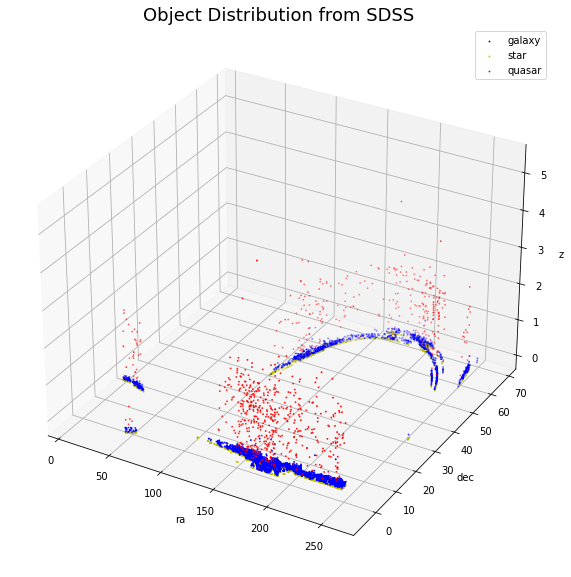

In [19]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['ra'],galaxy['dec'],galaxy['redshift'], s = 0.7, color = 'b', label = 'galaxy')
ax.scatter(star['ra'],star['dec'],star['redshift'], s = 0.7, color = 'y', label = 'star')
ax.scatter(quasar['ra'],quasar['dec'],quasar['redshift'], s = 0.7, color = 'r', label = 'quasar')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Object Distribution from SDSS',fontsize=18)
plt.legend()
plt.show()

## Color Magnitude Diagram

Text(0.5, 1.0, 'CMD')

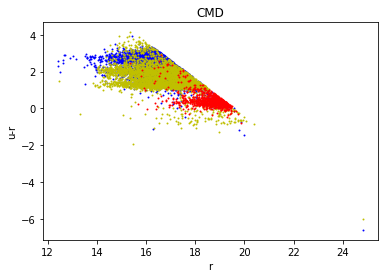

In [20]:
plt.scatter(galaxy['r'], galaxy['u-r'], s = 0.9, color = 'b')
plt.scatter(star['r'], star['u-r'], s = 0.9, color = 'y')
plt.scatter(quasar['r'], quasar['u-r'], s = 0.9, color = 'r')
plt.xlabel('r')
plt.ylabel('u-r')
plt.title('CMD')


## Plotting the Galaxy

In [21]:
galaxy.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
6,1.240000e+18,183.864379,0.019201,752,301,4,269,19.38322,17.88995,17.10537,...,559,0.100242,GALAXY,283.775497,61.545469,423.983759,-423.019753,-28.574390,0.142084,2.27785
9,1.240000e+18,183.973498,0.081626,752,301,4,270,18.67249,17.71375,17.49362,...,400,0.040508,GALAXY,283.956802,61.636921,173.648492,-173.230902,-12.032967,0.247386,1.17887
14,1.240000e+18,184.189574,0.099482,752,301,4,271,19.25667,17.54869,16.63578,...,389,0.072087,GALAXY,284.382394,61.715884,306.853300,-306.032861,-22.417660,0.532788,2.62089
19,1.240000e+18,184.380919,0.174323,752,301,4,273,17.81661,16.86976,16.53884,...,632,0.072772,GALAXY,284.726368,61.841409,309.720122,-308.813767,-23.658476,0.942324,1.27777


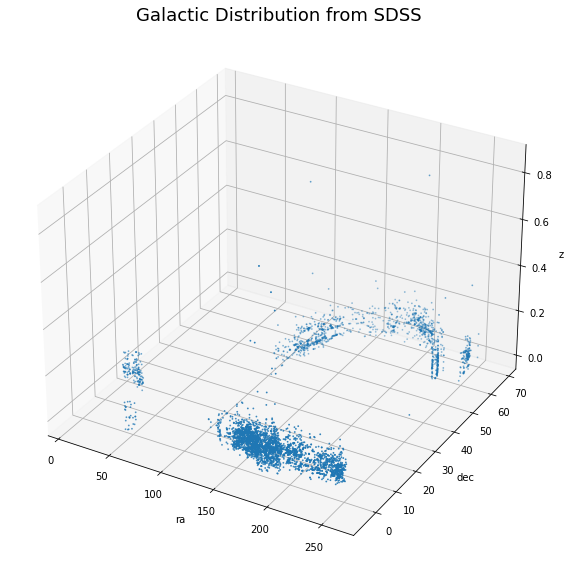

In [22]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['ra'],galaxy['dec'],galaxy['redshift'], s = 0.7)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Galactic Distribution from SDSS',fontsize=18)
plt.show()

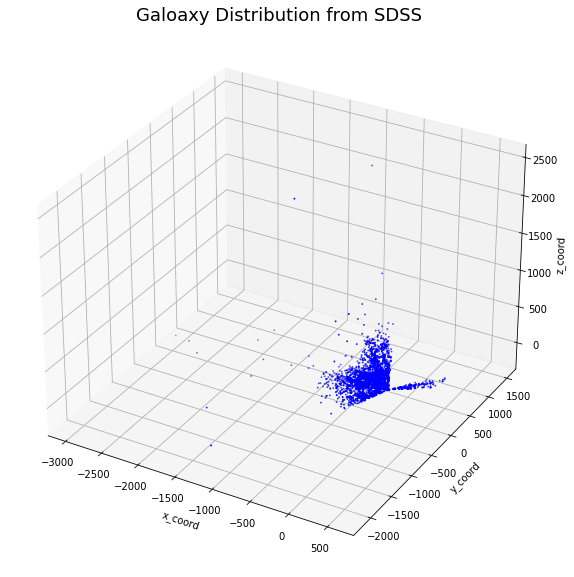

In [23]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['x_coord'],galaxy['y_coord'],galaxy['z_coord'], s = 0.7, color = 'b')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Galoaxy Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

<AxesSubplot:xlabel='redshift'>

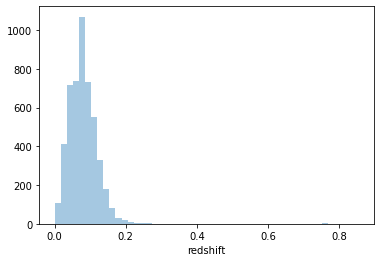

In [24]:
sns.distplot(galaxy['redshift'], kde = False)

Text(0.5, 1.0, 'Distance (Mpc)')

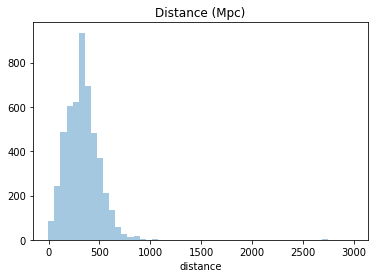

In [25]:
sns.distplot(galaxy['distance'], kde = False)
plt.title('Distance (Mpc)')

## Plotting The Stars

In [26]:
star.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156
5,1.240000e+18,183.847174,0.173694,752,301,4,269,19.43133,18.46779,18.16451,...,594,0.000315,STAR,283.645667,61.688141,1.360491,-1.357419,-0.091282,0.004124,1.26682


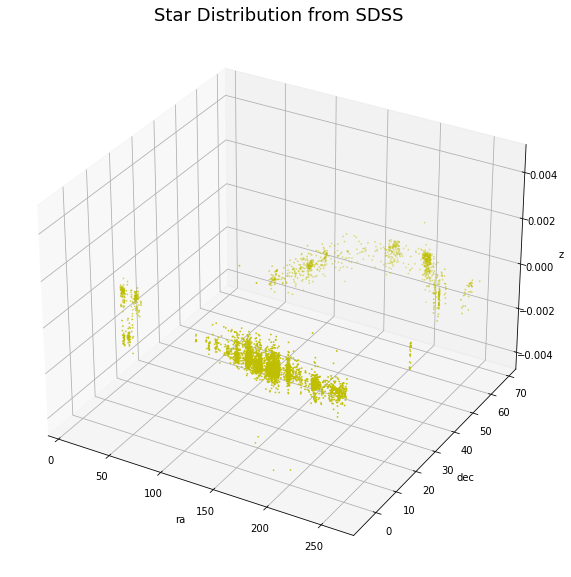

In [27]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(star['ra'],star['dec'],star['redshift'], s = 0.7, color = 'y')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Star Distribution from SDSS',fontsize=18)
plt.show()

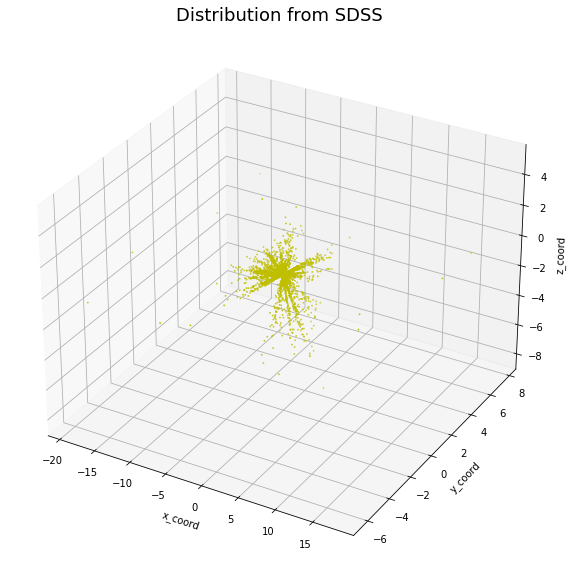

In [28]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(star['x_coord'],star['y_coord'],star['z_coord'], s = 0.7, color = 'y')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

<AxesSubplot:xlabel='redshift'>

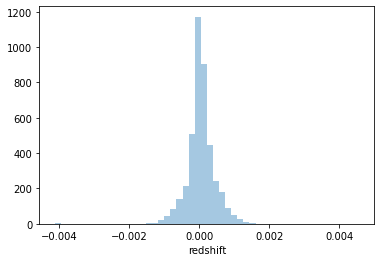

In [29]:
sns.distplot(star['redshift'], kde = False)


### Stars appeared to be centered at 0 redshift since it is too close

## Plotting the Quasi-Stellar Objects

In [30]:
quasar.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
15,1.240000e+18,184.350647,0.207230,752,301,4,272,18.73832,18.60962,18.39696,...,587,0.271937,QSO,284.645300,61.864576,1104.128966,-1100.940181,-83.758851,3.993446,0.34136
17,1.240000e+18,184.245664,0.198257,752,301,4,272,19.22143,19.30248,19.13823,...,583,1.178098,QSO,284.437100,61.826487,3785.572963,-3775.161956,-280.255743,13.098960,0.08320
22,1.240000e+18,184.654170,0.122673,752,301,4,274,19.07731,18.64518,18.49678,...,421,0.925173,QSO,285.313481,61.866527,3172.380399,-3161.912573,-257.410458,6.792237,0.58053
45,1.240000e+18,185.164376,0.074358,752,301,4,278,17.55001,17.42367,17.35734,...,516,2.044347,QSO,286.386196,61.953275,5357.022169,-5335.271155,-482.203161,6.952305,0.19267
62,1.240000e+18,160.384806,-0.586705,756,301,2,298,19.52565,19.29625,18.95885,...,281,0.134643,QSO,249.189134,48.254624,564.982557,-532.167848,189.655481,-5.785281,0.56680


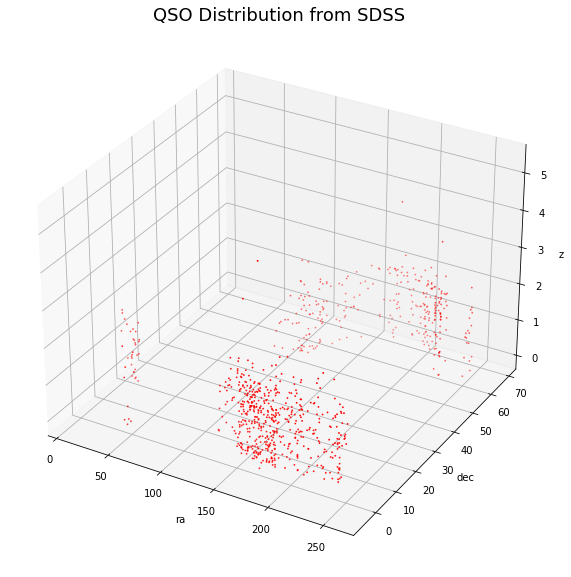

In [31]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(quasar['ra'],quasar['dec'],quasar['redshift'], s = 0.7, color = 'r')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('QSO Distribution from SDSS',fontsize=18)
plt.show()

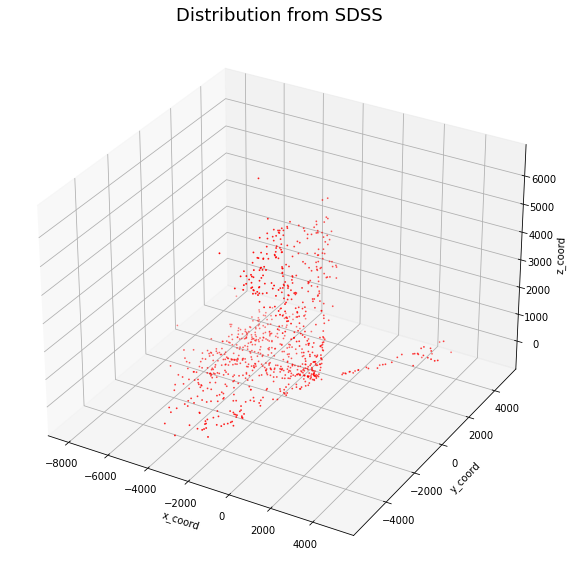

In [32]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(quasar['x_coord'],quasar['y_coord'],quasar['z_coord'], s = 0.7, color = 'r')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

## Summing up

In [33]:
df.head()

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


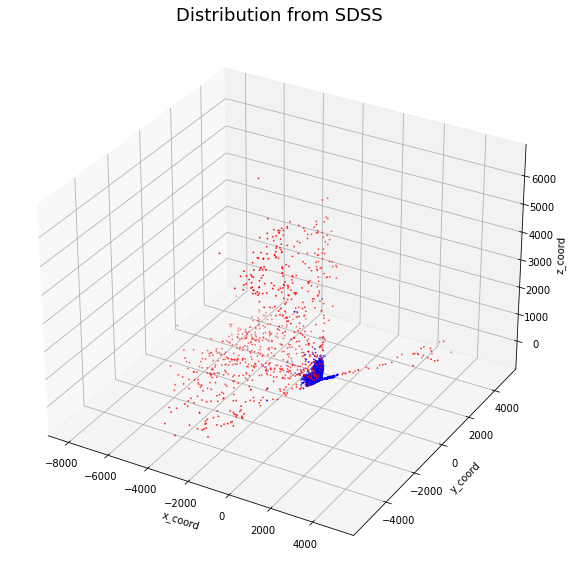

In [34]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['x_coord'],galaxy['y_coord'],galaxy['z_coord'], s = 0.7, color = 'b')
ax.scatter(star['x_coord'],star['y_coord'],star['z_coord'], s = 0.7, color = 'y')
ax.scatter(quasar['x_coord'],quasar['y_coord'],quasar['z_coord'], s = 0.7, color = 'r')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

### As expected, we could see distant quasars because they are too bright for a galaxy

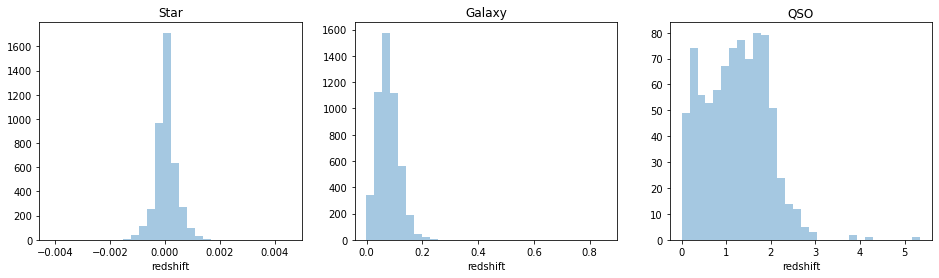

In [36]:
sdss_df = df
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(sdss_df[sdss_df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(sdss_df[sdss_df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(sdss_df[sdss_df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

### Okay, back to the primary dataset

In [34]:
display(df.head())
display(df.columns)

,objid,ra,dec,run,rerun,camcol,field,u,g,r,...,fiberid,redshift,class,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.240000e+18,183.531326,0.089693,752,301,4,267,19.47406,17.04240,15.94699,...,491,-0.000009,STAR,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.240000e+18,183.598370,0.135285,752,301,4,267,18.66280,17.21449,16.67637,...,541,-0.000055,STAR,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.240000e+18,183.680207,0.126185,752,301,4,268,19.38298,18.19169,17.47428,...,513,0.123111,GALAXY,283.339557,61.593309,517.978264,-516.908862,-33.247690,1.140766,1.90870
3,1.240000e+18,183.870529,0.049911,752,301,4,269,17.76536,16.60272,16.16116,...,510,-0.000111,STAR,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.240000e+18,183.883288,0.102557,752,301,4,269,17.55025,16.26342,16.43869,...,512,0.000590,STAR,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


Index(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift', 'class',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

In [35]:
df['class'] = df['class'].astype('category').cat.codes

In [36]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

### We need to change the object class into numerical label

### 0s are galaxies, 2s are stars, and 1s are QSOs.

In [37]:
df.columns

Index(['objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'u', 'g', 'r',
       'i', 'z', 'specobjid', 'plate', 'mjd', 'fiberid', 'redshift', 'class',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

### I will not dropping RA and dec because a group of stars or galaxies could entangled in mutual gravitation, so they're located in a same area.

In [38]:
X_df = df.drop(['objid','class'], axis=1).values
y_df = df['class'].values

In [39]:
display(X_df)
display(y_df)

array([[ 1.83531326e+02,  8.96930300e-02,  7.52000000e+02, ...,
         2.38677024e-03, -6.06606250e-05,  3.52707000e+00],
       [ 1.83598370e+02,  1.35285032e-01,  7.52000000e+02, ...,
         1.49017104e-02, -5.60617088e-04,  1.98643000e+00],
       [ 1.83680207e+02,  1.26185092e-01,  7.52000000e+02, ...,
        -3.32476898e+01,  1.14076609e+00,  1.90870000e+00],
       ...,
       [ 1.31552562e+02,  5.16669864e+01,  1.34500000e+03, ...,
        -8.06159573e-01, -1.36242409e+00,  1.23946000e+00],
       [ 1.31477151e+02,  5.17530678e+01,  1.34500000e+03, ...,
         2.80348773e+01,  4.74706942e+01,  1.35135000e+00],
       [ 1.31665012e+02,  5.18053075e+01,  1.34500000e+03, ...,
         2.30393799e+02,  3.91990300e+02,  2.97044000e+00]])

array([2, 2, 0, ..., 2, 0, 0], dtype=int8)

### We use RA and dec first (note that some galaxies and stars grouping in same areas thanks to mutual gravitation)

## Neural Network Model

### We will try to use standard scaler first

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

$ z = (x - u) / s $

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#ss = StandardScaler()
#X_df = ss.fit_transform(X_df)
minmax = MinMaxScaler()
X_df = minmax.fit_transform(X_df)

In [41]:
y_df = y_df.reshape(-1,1)

In [42]:
display(X_df)
display(y_df)

array([[0.69383227, 0.07402547, 0.40217391, ..., 0.5260953 , 0.07506555,
        0.94335623],
       [0.69409764, 0.07464221, 0.40217391, ..., 0.52609651, 0.07506548,
        0.7999866 ],
       [0.69442156, 0.07451911, 0.40217391, ..., 0.52289069, 0.07522591,
        0.79275316],
       ...,
       [0.48809742, 0.77172401, 0.93931159, ..., 0.52601737, 0.07487406,
        0.7304747 ],
       [0.48779894, 0.77288846, 0.93931159, ..., 0.52879704, 0.08173817,
        0.74088701],
       [0.4885425 , 0.77359512, 0.93931159, ..., 0.54830017, 0.13016477,
        0.89155708]])

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=int8)

In [43]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_df = enc.fit_transform(y_df).toarray()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.25)
early_stop = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

In [45]:
X_train.shape

(7500, 23)

In [46]:
y_train.shape

(7500, 3)

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [48]:
model = Sequential()
model.add(Dense(64, input_dim=23, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
start_time_train = timeit.default_timer()
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=30, batch_size=32,callbacks=[early_stop])
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for NN: ' + str(upsampling_elapsed))

Epoch 1/30
211/211 [==============================] - 3s 7ms/step - loss: 0.9588 - accuracy: 0.4835 - val_loss: 0.9060 - val_accuracy: 0.5173
Epoch 2/30
211/211 [==============================] - 1s 5ms/step - loss: 0.8562 - accuracy: 0.6434 - val_loss: 0.6830 - val_accuracy: 0.7813
Epoch 3/30
211/211 [==============================] - 1s 6ms/step - loss: 0.6155 - accuracy: 0.8062 - val_loss: 0.6061 - val_accuracy: 0.7827
Epoch 4/30
211/211 [==============================] - 1s 6ms/step - loss: 0.5533 - accuracy: 0.7993 - val_loss: 0.5248 - val_accuracy: 0.7987
Epoch 5/30
211/211 [==============================] - 1s 6ms/step - loss: 0.4564 - accuracy: 0.8164 - val_loss: 0.4121 - val_accuracy: 0.8347
Epoch 6/30
211/211 [==============================] - 1s 6ms/step - loss: 0.3795 - accuracy: 0.8640 - val_loss: 0.3329 - val_accuracy: 0.8867
Epoch 7/30
211/211 [==============================] - 1s 6ms/step - loss: 0.3252 - accuracy: 0.8912 - val_loss: 0.2754 - val_accuracy: 0.9040
Epoch 

In [50]:
model.save_weights('model_final_test_run1.h5')

In [51]:
prediction = []
test = []

In [52]:
y_predict = model.predict(X_test)

In [53]:
for i in range(len(y_test)): 
    prediction.append(np.argmax(y_predict[i]))
    test.append(np.argmax(y_test[i])) 

In [54]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(prediction,test) 
print('Accuracy CNN is:', acc*100, '%')

Accuracy CNN is: 98.24000000000001 %


In [55]:
print(classification_report(test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1228
           1       0.95      0.95      0.95       209
           2       0.98      1.00      0.99      1063

    accuracy                           0.98      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.98      0.98      0.98      2500



In [56]:
confusion_matrix(test, prediction)

array([[1195,   11,   22],
       [  10,  199,    0],
       [   1,    0, 1062]], dtype=int64)

In [57]:
#Saving in CSV...
compare = pd.DataFrame(prediction, columns = ['prediction'])
compare['test'] = test

In [58]:
result = pd.DataFrame(X_test, columns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'])

In [59]:
result['class'] = compare['test']
result['prediction'] = compare['prediction']

result.to_csv('object_prediction_test_run.csv', index = False)

# SVM

In [60]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [61]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)
data=data.drop(['objid','rerun','specobjid','fiberid'],axis=1)
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [62]:
start_time_train = timeit.default_timer()
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

start_time_train = timeit.default_timer()
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for POLY: ' + str(upsampling_elapsed))

Training time for RBF: 2.106169599999987
Training time for POLY: 1.059413300000017


In [63]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [64]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  92.90
F1 (Polynomial Kernel):  92.89


In [65]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  86.75
F1 (RBF Kernel):  86.21


In [66]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       816
           1       0.90      0.97      0.93      1000
           2       0.99      0.91      0.95       184

    accuracy                           0.93      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [67]:
confusion_matrix(y_test, poly_pred)

array([[720,  96,   0],
       [ 28, 970,   2],
       [  0,  16, 168]], dtype=int64)

In [68]:
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       816
           1       0.89      0.93      0.91      1000
           2       0.99      0.48      0.65       184

    accuracy                           0.87      2000
   macro avg       0.90      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000



In [69]:
confusion_matrix(y_test, rbf_pred)

array([[715, 101,   0],
       [ 68, 931,   1],
       [ 80,  15,  89]], dtype=int64)

# Naive Bayes

In [166]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [167]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [168]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

<AxesSubplot:>

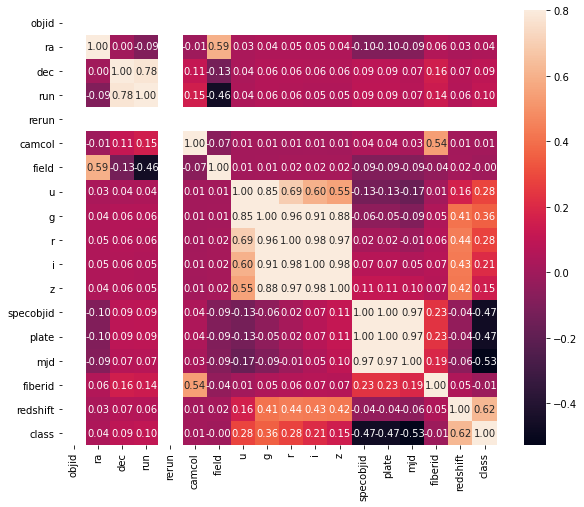

In [169]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [170]:
data=data.drop(['objid','rerun','specobjid','fiberid'],axis=1)

In [171]:
#data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [173]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

start_time_train = timeit.default_timer()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for Naive Bayes: ' + str(upsampling_elapsed))

Training time for Naive Bayes: 0.017835399994510226


In [174]:
acc = accuracy_score(y_pred,y_test) 
print('Accuracy of Naive Bayes is:', round(acc*100,2), '%')

Accuracy of Naive Bayes is: 97.05 %


In [175]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       804
           1       0.97      0.98      0.98       983
           2       0.96      0.83      0.89       213

    accuracy                           0.97      2000
   macro avg       0.97      0.94      0.95      2000
weighted avg       0.97      0.97      0.97      2000



In [176]:
confusion_matrix(y_test, y_pred)

array([[796,   8,  12],
       [  8, 968,  24],
       [  0,   7, 177]], dtype=int64)

# KNN

In [81]:
data=pd.read_csv('input/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [82]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [83]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

<AxesSubplot:>

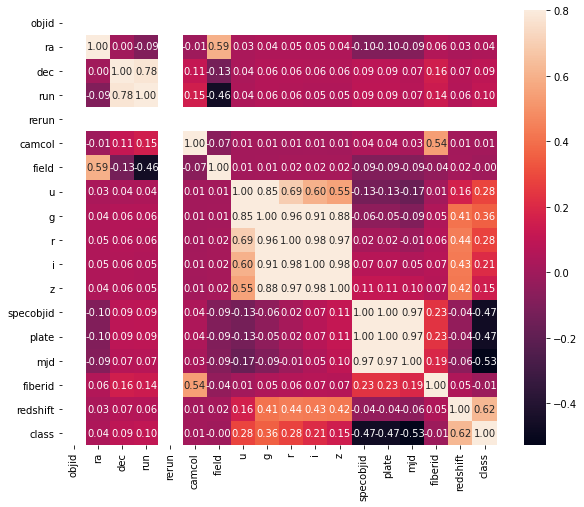

In [84]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [85]:
data=data.drop(['objid','rerun','specobjid','fiberid'],axis=1)

In [86]:
data

,ra,dec,run,camcol,field,u,g,r,i,z,plate,mjd,redshift,class
0,183.531326,0.089693,752,4,267,19.47406,17.04240,15.94699,15.50342,15.22531,3306,54922,-0.000009,0
1,183.598370,0.135285,752,4,267,18.66280,17.21449,16.67637,16.48922,16.39150,323,51615,-0.000055,0
2,183.680207,0.126185,752,4,268,19.38298,18.19169,17.47428,17.08732,16.80125,287,52023,0.123111,1
3,183.870529,0.049911,752,4,269,17.76536,16.60272,16.16116,15.98233,15.90438,3306,54922,-0.000111,0
4,183.883288,0.102557,752,4,269,17.55025,16.26342,16.43869,16.55492,16.61326,3306,54922,0.000590,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,1345,3,161,18.81777,17.47053,16.91508,16.68305,16.50570,447,51877,0.027583,1
9996,131.306083,51.671341,1345,3,162,18.27255,17.43849,17.07692,16.71661,16.69897,447,51877,0.117772,1
9997,131.552562,51.666986,1345,3,162,18.75818,17.77784,17.51872,17.43302,17.42048,7303,57013,-0.000402,0
9998,131.477151,51.753068,1345,3,163,18.88287,17.91068,17.53152,17.36284,17.13988,447,51877,0.014019,1


In [87]:
#data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)

In [88]:
y

0       0
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: class, Length: 10000, dtype: int32

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
start_time_train = timeit.default_timer()
neigh.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for KNN: ' + str(upsampling_elapsed))
KNeighborsClassifier()

Training time for KNN: 0.028755999999987125


KNeighborsClassifier()

In [91]:
ypred = neigh.predict(X_test)
Test_acc_random_forest = round(neigh.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  91.1


In [92]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       816
           1       0.90      0.94      0.92      1000
           2       0.98      0.88      0.92       184

    accuracy                           0.91      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [93]:
confusion_matrix(y_test, ypred)

array([[722,  91,   3],
       [ 60, 939,   1],
       [  9,  14, 161]], dtype=int64)

# Random Forest

In [177]:
data=pd.read_csv('input/SDSS_final.csv')

In [178]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')

In [179]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

<AxesSubplot:>

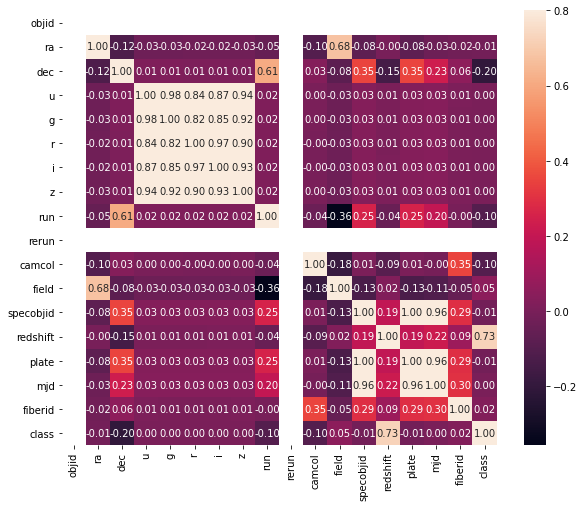

In [180]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [181]:
data=data.drop(['objid','rerun','specobjid','fiberid'],axis=1)

In [182]:
data

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,class
0,209.439050,-0.293126,21.40675,20.88552,20.89071,20.91209,20.72144,752,3,440,2.399763,4037,55631,2
1,121.877577,45.077250,25.92152,22.26305,20.55681,19.71160,19.16875,1331,5,126,0.456324,6378,56330,1
2,124.756270,46.143024,22.10301,20.44919,18.64295,17.98695,17.58418,1331,3,140,0.354595,441,51868,1
3,183.849461,0.143010,22.85248,22.09973,20.28476,19.41890,19.06876,752,4,269,0.480464,3845,55323,1
4,189.810817,-2.207314,20.58849,20.14927,20.02577,20.14147,19.83024,1140,4,246,0.748259,3778,55213,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,151.201083,0.669279,18.81863,18.52837,18.08999,17.74230,17.65442,756,5,236,0.214063,269,51910,2
29996,188.829694,-1.649740,22.98777,21.13206,21.01412,21.17362,21.28052,1231,6,131,0.000145,3778,55213,0
29997,217.679029,-0.721670,24.81813,22.65607,21.01129,19.97748,19.63805,752,2,495,0.557969,4028,55621,1
29998,160.476541,-0.032671,22.54886,22.03707,20.39451,19.32129,18.54318,756,3,298,0.550828,3834,56014,1


In [183]:
#data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['class'],axis=1)
y=data['class']
X=StandardScaler().fit_transform(X)

In [184]:
y

0        2
1        1
2        1
3        1
4        2
        ..
29995    2
29996    0
29997    1
29998    1
29999    1
Name: class, Length: 30000, dtype: int32

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)

start_time_train = timeit.default_timer()
random_forest.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

Training time for RBF: 10.74075170001015


In [187]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  98.1


In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2020
           1       0.97      0.98      0.97      2019
           2       0.98      0.96      0.97      1961

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



In [189]:
confusion_matrix(y_test, y_pred)

array([[2020,    0,    0],
       [   8, 1977,   34],
       [   3,   69, 1889]], dtype=int64)

In [107]:
import joblib
# save the model to disk
joblib.dump(random_forest, "./random_forest_test.joblib")

['./random_forest_test.joblib']


# Live Testing

0. https://skyserver.sdss.org/dr14/en/tools/crossid/crossid.aspx#help
1. Download panna udan Table name column ai remove seiya vendum
2. Piragu, z endra column ai redshift endru maatra vendum


In [190]:
from PIL import Image
import requests

def print_image(df,index):
    radeg, decdeg = df['ra'][index],df['dec'][index]
    scale = 0.015
    height, width = 512, 512

    str1 = 'http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image'
    str2 = '&ra={:f}&dec={:f}&scale=0.015&width=1024&height=1024&opt=&query='.format(radeg,decdeg)
    url = str1 + str2
    print(url)

    try:
        im = Image.open(requests.get(url, stream=True).raw)
    except:
        pass
        print("Error")
    
    return im


In [191]:
data=pd.read_csv('Test.csv')

In [192]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'type')

In [193]:
data['type']=data['type'].map({'STAR':2,'GALAXY':0,'QSO':1}).astype(int)
objid = data['objID']

In [194]:
data=data.drop(['objID','rerun','specObjID','fiberID'],axis=1)

In [195]:
data.head()

,ra,dec,run,camcol,field,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,plate,mjd,redshift,type
0,15.502002,0.515352,4263,5,219,21.99938,19.73039,18.67928,18.26405,18.00196,1498,52914,0.000114,2
1,15.493380,0.513567,4263,5,219,23.46245,21.21311,19.44700,18.82201,18.37411,693,52254,0.373543,0
2,15.493380,0.513567,4263,5,219,23.46245,21.21311,19.44700,18.82201,18.37411,4225,55455,0.373478,0
3,15.503910,0.512176,4263,5,219,19.15817,18.05311,17.63875,17.40735,17.27723,396,51816,0.018285,0
4,15.491410,0.463359,4263,5,219,22.73320,20.98437,19.29221,18.63999,18.21168,693,52254,0.390870,0


In [196]:
data[['redshift','type']].groupby(['type'],as_index=False).mean().sort_values(by='type',ascending=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['type'],axis=1)
y=data['type'].values
X=StandardScaler().fit_transform(X)

In [197]:
loaded_rf = joblib.load("./random_forest_test.joblib")

In [198]:
loaded_rf = random_forest

In [199]:
y_pred = loaded_rf.predict(X)

In [200]:
Test_acc_random_forest = round(loaded_rf.score(X, y) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  37.209


In [201]:
confusion_matrix(y_pred,y)

array([[ 9,  0,  5],
       [ 5,  0,  7],
       [10,  0,  7]], dtype=int64)